# ΑΣΚΗΣΗ 3 | Βαθιά μάθηση στο CIFAR-100
---
Ευδοκία Μπαρουξή (*03116658*)

Γιάννης Τζανακάκης (*03114436*)


---

Ομάδα 83

## Εισαγωγή
Στην παρούσα εργασία, καλούμαστε να βελτιστοποιήσουμε την απόδοση μοντέλων βαθιάς μάθησης στο σύνολο δεδομένων CIFAR-100 χρησιμοποιώντας την βιβλιοθήκη TensorFlow 2. Στόχος μας είναι να κατηγοριοποιήσουμε αποδοτικά ένα σύνολο εικόνων.

Στο πλαίσιο του παρακάτω project:

*   Θα κατασκευάσουμε συνελικτικά νευρωνικά δίκτυα από το μηδέν, πειραματιζόμενοι με διάφορες αρχιτεκτονικές δικτύων.
*   Θα προσαρμόσουμε αρχιτεκτονικές προεκπαιδευμένων μοντέλων μέσω μεταφοράς γνώσης.
*   Θα βελτιστοποιήσουμε τα παραπάνω μοντέλα, αξιοποιώντας διάφορες τεχνικές βελτιστοποίησης (επαύξηση δεδομένων, διαχείριση μνήμης κα).

Πρώτα αναφέρουμε μερικές πληροφορίες για το σύνολο δεδομένων που καλούμαστε να ταξινομήσουμε.


# Το Σύνολο Δεδομένων CIFAR-100

## Λίγα Λόγια
Tα [CIFAR-10 και CIFAR-100](https://www.cs.toronto.edu/~kriz/cifar.html) datasets, περιέχουν 60000 έγρωμες εικόνες διαστάσεων 32x32 (32x32x3 αν συμπεριλάβουμε την RGB διάσταση). Αποτελούν "ταμπελοδοτημένα" υποσύνολα (το ίδιο υποσύνολο) του [80 million tiny images](http://groups.csail.mit.edu/vision/TinyImages/) dataset και συλλέχθηκαν από τους  Alex Krizhevsky, Vinod Nair, και Geoffrey Hinton.

Τα 2 σύνολα δεδομένων διαφέρουν μόνο ως προς την κατηγοριοποίησή τους:
*   Οι εικόνες του CIFAR-10 κατηγοριοποιούνται σε 10 κατηγορίες-labels. Κάθε κατηγορία περιέχει 6000 εικόνες. Υπάρχουν 50000 εικόνες για εκπαίδευση και 1000 εικόνες για test.
Οι κλάσεις διαμερίζουν το σύνολο (αμοιβαίως αποκλειώμενες και "επί" του συνόλου εικόνων).
* Το CIFAR-100 αναφέρεται στο ίδιο σύνολο, αλλά με 100 διαφορετικά labels και άρα 600 εικόνες ανά κατηγορία. Κάθε εικόνα έχει ένα "fine" label που αφορά σε μια από τις 100 κατηγορίες κι ένα "coarse" label που αναφέρεται σε 20 υπερκατηγορίες.


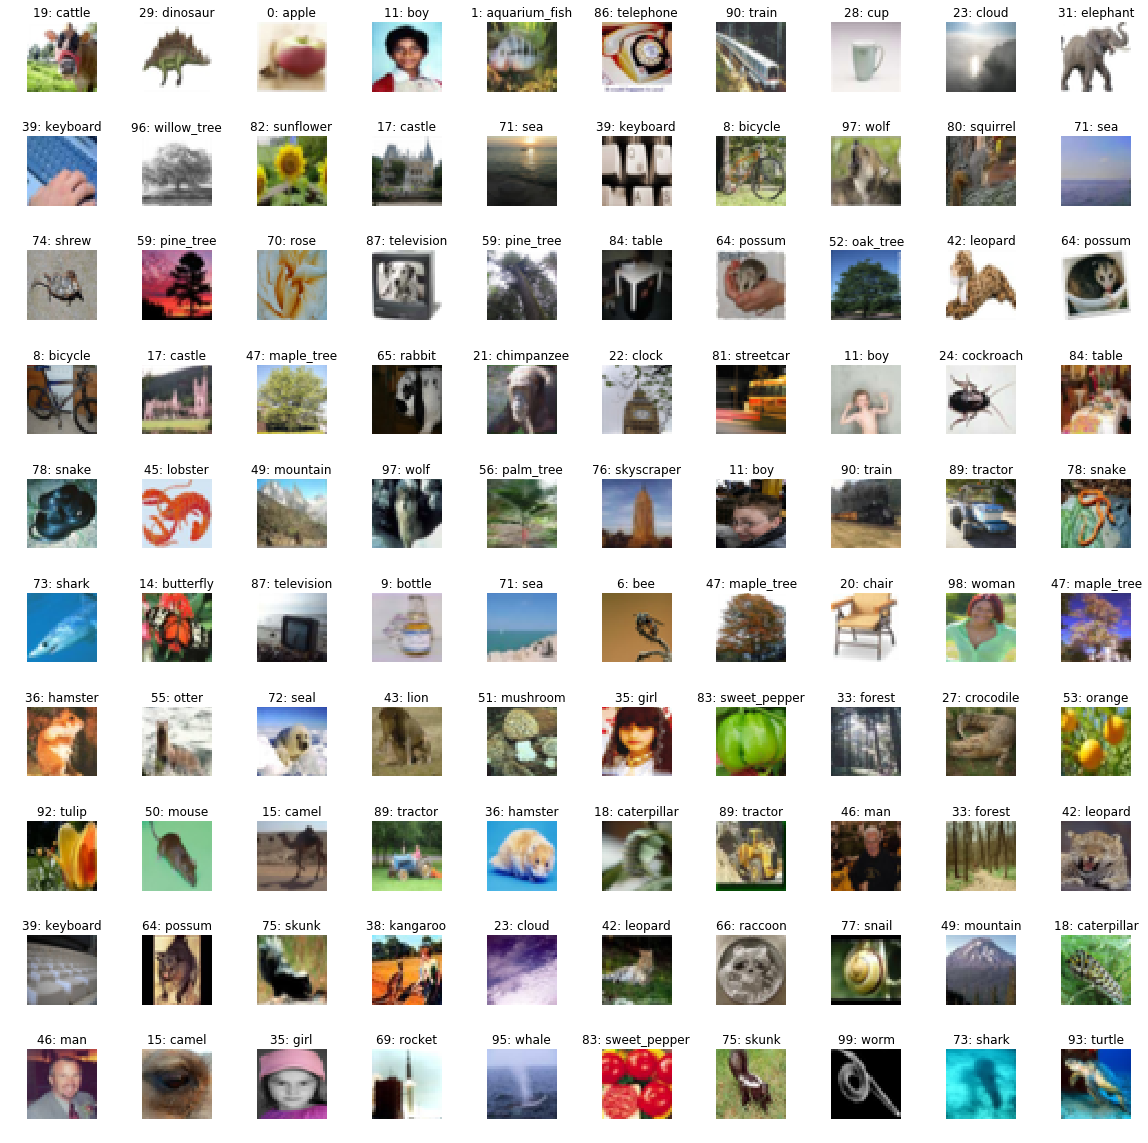

## Κλάσεις και Υπερκλάσεις
Όπως προαναφέρθηκε, κάθε εικόνα έχει ένα "fine" label που αφορά σε μια από τις 100 κατηγορίες κι ένα "coarse" label που αναφέρεται σε 20 υπερκατηγορίες. Οι 20 υπερκατηγορίες -μαζί με τις 100 συνολικά υποκατηγορίες τους- είναι οι εξής:


1. AQUATIC MAMMALS:	
beaver, dolphin, otter, seal, whale
---
2. FISH:	
aquarium fish, flatfish, ray, shark, trout
---
3.  FLOWERS:	
orchids, poppies, roses, sunflowers, tulips
---
4. FOOD CONTAINERS:	
bottles, bowls, cans, cups, plates
---
5. FRUITS & VEGETABLES:	
apples, mushrooms, oranges, pears, sweet peppers
---
6. HOUSEHOLD ELECTRICAL DEVICES:<br>
clock, computer keyboard, lamp, telephone, television
---
7. HOUSEHOLD FURNITURE:	
bed, chair, couch, table, wardrobe
---
8. INSECTS:	
bee, beetle, butterfly, caterpillar, cockroach
---
9. LARGE CARNIVORES:	
bear, leopard, lion, tiger, wolf
---
10. LARGE MAN-MADE OUTDOOR THINGS:<br>
bridge, castle, house, road, skyscraper
---
11. LARGE NATURAL OUTDOOR SCENES:	
cloud, forest, mountain, plain, sea
---
12. LARGE OMNIVORES & HERBIVORES:	
camel, cattle, chimpanzee, elephant, kangaroo
---
13. MEDIUM-SIZED MAMMALS:	
fox, porcupine, possum, raccoon, skunk
---
14. NON-IΝSECT INVERTEBRATES:	
crab, lobster, snail, spider, worm
---
15. PEOPLE:	
baby, boy, girl, man, woman
---
16. REPTILES:	
crocodile, dinosaur, lizard, snake, turtle
---
17. SMALL MAMMALS:	
hamster, mouse, rabbit, shrew, squirrel
---
18. TREES:	
maple, oak, palm, pine, willow
---
19. VEHICLES 1:	
bicycle, bus, motorcycle, pickup truck, train
---
20. VEHICLES 2:	
lawn-mower, rocket, streetcar, tank, tractor
---

To CIFAR-10 Θεωρείται πλέον εύκολο dataset αφού η ακρίβεια στην κατηγοριοποίησή του ξεπερνά το 99%. Το CIFAR-100 θεωρείται δυσκολότερο μιας και η state of the art αρχιτεκτονική* - σύμφωνα με το [benchmarks AI](https://benchmarks.ai/cifar-100) - κατηγοριοποιεί τις εικόνες με ακρίβεια 93.51%.

*([Big Transfer (BiT)](https://arxiv.org/pdf/1912.11370.pdf): General Visual Representation Learning, Δεκέμβριος 2019)

# Παρεχόμενη λειτουργικότητα
Χρησιμοποιούμε τον κώδικα που μας παρέχεται στο αρχείο της εκφώνησης ([Εργασία 3 TensorFlow 2 - CIFAR-100.ipynb](https://colab.research.google.com/drive/1sTTaW7XSoyDT5iwlZedeMB2xhyU1nh3y#scrollTo=yypACH_oZx_i)) για:
* την εξαγωγή του sample 
* τις συναρτήσεις εκπαίδευσης
* τις συναρτήσεις για τις γραφικές παραστάσεις της εκπαίδευσης και την απόδοση στο σύνολο ελέγχου (test set).

Εισάγουμε τις απαραίτητες βιβλιοθήκες:

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Εξαγωγή του Sample

In [2]:
# helper functions

# select from from_list elements with index in index_list
def select_from_list(from_list, index_list):
  filtered_list= [from_list[i] for i in index_list]
  return(filtered_list)

# append in filtered_list the index of each element of unfiltered_list if it exists in in target_list
def get_ds_index(unfiltered_list, target_list):
  index = 0
  filtered_list=[]
  for i_ in unfiltered_list:
    if i_[0] in target_list:
      filtered_list.append(index)
    index += 1
  return(filtered_list)

# select a url for a unique subset of CIFAR-100 with 20, 40, 60, or 80 classes
def select_classes_number(classes_number = 80):
  cifar100_20_classes_url = "https://pastebin.com/raw/nzE1n98V"
  cifar100_40_classes_url = "https://pastebin.com/raw/zGX4mCNP"
  cifar100_60_classes_url = "https://pastebin.com/raw/nsDTd3Qn"
  cifar100_80_classes_url = "https://pastebin.com/raw/SNbXz700"
  if classes_number == 20:
    return cifar100_20_classes_url
  elif classes_number == 40:
    return cifar100_40_classes_url
  elif classes_number == 60:
    return cifar100_60_classes_url
  elif classes_number == 80:
    return cifar100_80_classes_url
  else:
    return -1

Φορτώνουμε όλο το dataset:

In [3]:
(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar100.load_data(label_mode = 'fine')

169009152/169001437 [==============================] - 2s 0us/step


Aντικαθιστούμε τον αριθμό ομάδας για την εξαγωγή του ζητούμενου sample:

In [4]:
# REPLACE WITH YOUR TEAM NUMBER
team_seed = 83

Επιλέγουμε να συμπεριλάβουμε 80 (από τις 100) κατηγορίες (labels) εικόνων του συνόλου δεδομένων:

In [5]:
# select the number of classes
cifar100_classes_url = select_classes_number(80)

Δημιουργούμε το μοναδικό dataset της ομάδας μας:

In [6]:
team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed,:].values.tolist()
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

Το αρχικό trainset ήταν 50000 ενώ το trainset του sample μας είναι:

In [7]:
print(x_train_all.shape)
print(x_train_ds.shape)

(50000, 32, 32, 3)
(40000, 32, 32, 3)


Η κάθε είκόνα έχει διαστάσεις 32x32x3 όπως προαναφέρθηκε:

In [8]:
print(x_train_ds[1].shape)

(32, 32, 3)


Το πλήθος και το όνομα των κατηγοριών:

In [9]:
CLASSES_NUM = len(our_classes)
print(CLASSES_NUM)
print(our_classes)

80
['apple', ' aquarium_fish', ' baby', ' bear', ' beaver', ' bed', ' beetle', ' bicycle', ' bottle', ' boy', ' bus', ' butterfly', ' camel', ' can', ' castle', ' caterpillar', ' cattle', ' chair', ' chimpanzee', ' clock', ' cloud', ' couch', ' crab', ' dinosaur', ' flatfish', ' forest', ' girl', ' hamster', ' house', ' kangaroo', ' keyboard', ' lamp', ' leopard', ' lion', ' lobster', ' man', ' mountain', ' mouse', ' mushroom', ' oak_tree', ' orange', ' orchid', ' otter', ' palm_tree', ' pear', ' pickup_truck', ' pine_tree', ' plain', ' plate', ' porcupine', ' possum', ' rabbit', ' raccoon', ' ray', ' road', ' rocket', ' rose', ' sea', ' seal', ' shark', ' skunk', ' snail', ' spider', ' squirrel', ' streetcar', ' sunflower', ' table', ' tank', ' telephone', ' television', ' tiger', ' tractor', ' trout', ' tulip', ' turtle', ' wardrobe', ' whale', ' wolf', ' woman', ' worm']


## Επισκόπηση του Sample

In [10]:
# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)

# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255
y_val = y_train_ds[-val_size:]
x_train = x_train_ds[:-val_size]/255
y_train = y_train_ds[:-val_size]
x_test = x_test_ds/255
y_test = y_test_ds

print(len(x_val))

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# get class label from class index
def class_label_from_index(fine_category):
  return(CIFAR100_LABELS_LIST[fine_category.item(0)])

6000
Train: X=(34000, 32, 32, 3), y=(34000, 1)
Validation: X=(6000, 32, 32, 3), y=(6000, 1)
Test: X=(8000, 32, 32, 3), y=(8000, 1)


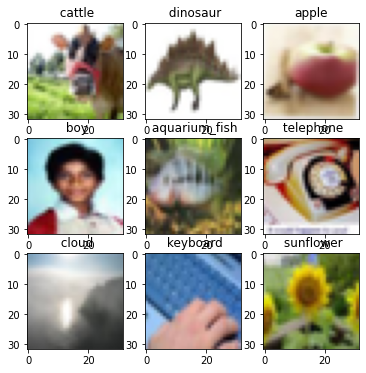

In [11]:
# plot first few images
plt.figure(figsize = (6, 6))
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train[i]))
	# plot raw pixel data
  plt.imshow(x_train[i], cmap = plt.get_cmap('gray'))
  #show the figure
plt.show()

In [12]:
# find unique labels using a dict -- key: real label, value: transformed label
labels = {}
for i,label in enumerate(np.unique(y_train)):
    labels[label] = i

print(labels)

# transform y sets
y_train = [labels[int(label)] for label in y_train]
y_val = [labels[int(label)] for label in y_val]
y_test = [labels[int(label)] for label in y_test]

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 7: 6, 8: 7, 9: 8, 11: 9, 13: 10, 14: 11, 15: 12, 16: 13, 17: 14, 18: 15, 19: 16, 20: 17, 21: 18, 22: 19, 23: 20, 25: 21, 26: 22, 29: 23, 32: 24, 33: 25, 35: 26, 36: 27, 37: 28, 38: 29, 39: 30, 40: 31, 42: 32, 43: 33, 45: 34, 46: 35, 49: 36, 50: 37, 51: 38, 52: 39, 53: 40, 54: 41, 55: 42, 56: 43, 57: 44, 58: 45, 59: 46, 60: 47, 61: 48, 63: 49, 64: 50, 65: 51, 66: 52, 67: 53, 68: 54, 69: 55, 70: 56, 71: 57, 72: 58, 73: 59, 75: 60, 77: 61, 79: 62, 80: 63, 81: 64, 82: 65, 84: 66, 85: 67, 86: 68, 87: 69, 88: 70, 89: 71, 91: 72, 92: 73, 93: 74, 94: 75, 95: 76, 97: 77, 98: 78, 99: 79}


## Συναρτήσεις Εκπαίδευσης

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE # https://www.tensorflow.org/guide/data_performance

def _input_fn(x, y, batch_size, reshuffle_each_iteration = None, repeat = False):
    # Creates a PrefetchDataset object
    '''
        x:                          numpy Array
        y:                          numpy Array
        batch_size:                 int
        reshuffle_each_iteration:   Boolean
        repeat:                     Boolean
    '''

    ds = tf.data.Dataset.from_tensor_slices((x,y))
    ds = ds.shuffle(buffer_size=data_size, reshuffle_each_iteration=reshuffle_each_iteration)
    if repeat:
        ds = ds.repeat()
    ds = ds.batch(batch_size)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds 


def train_model(model, callbacks, epochs=25, steps_per_epoch=None, validation_steps=None):
    # Training the given model and returns its learning history
    history = model.fit(train_ds, 
                        epochs = epochs, 
                        steps_per_epoch = steps_per_epoch, 
                        validation_data = validation_ds,
                        validation_steps = validation_steps,
                        callbacks = callbacks)
    return(history)

## Γραφικές Παραστάσεις Εκπαίδευσης

In [14]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	plt.figure(figsize=(12, 12))
	plt.suptitle('Training Curves')
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='val')
	plt.legend(loc='upper right')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='val')
	plt.legend(loc='lower right')
	return plt

## Απόδοση Δικτύου 

In [15]:
def model_evaluation(model, evaluation_steps):
	print('\nTest set evaluation metrics')
	loss0,accuracy0 = model.evaluate(test_ds, steps = evaluation_steps)
	print("loss: {:.2f}".format(loss0))
	print("accuracy: {:.2f}".format(accuracy0))

def model_report(model, history, evaluation_steps = 10):
	plt = summarize_diagnostics(history)
	plt.show()
	model_evaluation(model, evaluation_steps)

# Βελτίστοποίηση με Πειράματα
Έχοντας πλέον το sample και την παρεχόμενη λειτουργικότητα, καλούμαστε να ταξινομήσουμε τις εικόνες στις διάφορες κατηγορίες, κατασκευάζοντας και εκπαιδεύοντας συνελικτικά δίκτυα "from skratch" ή προσαρμόζοντας προεκπαιδευμένα δίκτυα.

Θα ξεκινήσουμε παρουσιάζοντας το cnn που σχεδιάσαμε από το μηδέν: 

## Κατασκευή από το μηδέν



### Αρχιτεκτονική
Επιλέγουμε ένα ..

In [17]:
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from keras.regularizers import l1
from keras.callbacks import Callback, LearningRateScheduler, TensorBoard, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers


In [20]:
def init_myCNN(summary = True):
# , kernel_regularizer = l1_l2(0.001), bias_regularizer = l1_l2(0.001), activity_regularizer = l1_l2(0.001)
    model = models.Sequential()

    model.add(layers.Conv2D(64, 3, activation = 'relu', input_shape = (32, 32, 3)))  
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, 3, activation = 'relu'))
    model.add(layers.MaxPooling2D((2, 2))) 
    model.add(layers.Dropout(0.2))    

    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, 3, activation = 'relu'))
    model.add(layers.BatchNormalization())    
    model.add(layers.Conv2D(128, 3, activation = 'relu'))  
    model.add(layers.MaxPooling2D((2, 2))) 
    model.add(layers.Dropout(0.2))

    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(256, 3, activation = 'relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(256, 3, activation = 'relu'))     
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation = 'relu'))
    model.add(layers.Dense(256, activation = 'relu'))    
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(80, activation = 'softmax'))

    model.compile(optimizer = optimizers.Adam(learning_rate = 0.0002), 
                  loss = tf.keras.losses.sparse_categorical_crossentropy,
                  metrics = ["accuracy"])
    if summary: 
        model.summary()

    return model
    

Επαυξάνουμε τα δεδομένα:

In [21]:
from keras.preprocessing.image import ImageDataGenerator

image_gen_train = ImageDataGenerator(horizontal_flip = True, rotation_range = 15, width_shift_range = .12, height_shift_range = .12)

### Εκπαίδευση
Έχοντας σχεδιάσει την αρχιτεκτονική του συνελικτικού δικτύου μπορούμε να εκπαιδεύσουμε το μοντέλο, πειραματιζόμενοι με τις παραμέτρους:

In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint

BATCH_SIZE = 300

train_ds      = image_gen_train.flow(x = x_train, y = y_train, batch_size = BATCH_SIZE, shuffle = True)
validation_ds = _input_fn(x_val, y_val, batch_size = BATCH_SIZE, reshuffle_each_iteration = False, repeat = False) 
test_ds       = _input_fn(x_test, y_test, batch_size = 1, reshuffle_each_iteration = False, repeat = False)

mycnn = init_myCNN(summary = True)

mc = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy')

cnn_history = train_model(mycnn, 
                          epochs = 250, 
                          steps_per_epoch = np.ceil(x_train.shape[0] / BATCH_SIZE), 
                          callbacks = [mc],
                          validation_steps = None)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
batch_normalization_5 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 128)      

### Επισκόπηση
Αφού ολοκληρώσαμε και τη φάση της εκπαίδευσης, ελέγχουμε τις καμπύλες εκπαίδευσης και την απόδοση του μοντέλου μας στο σύνολο ελέγχου (test set):

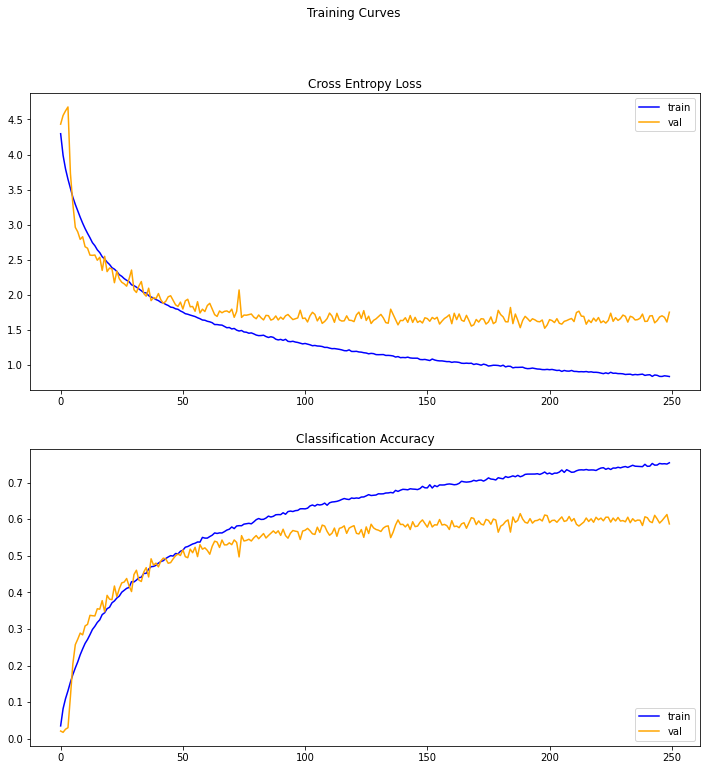


Test set evaluation metrics
8000/8000 [==============================] - 20s 2ms/step - loss: 1.7302 - accuracy: 0.5909
loss: 1.73
accuracy: 0.59


In [23]:
from tensorflow.keras.models import load_model
saved_cnn = load_model('best_model.h5')

model_report(saved_cnn, cnn_history, evaluation_steps = None)

In [ ]:
def init_myCNN(summary = True):
# , kernel_regularizer = l1_l2(0.001), bias_regularizer = l1_l2(0.001), activity_regularizer = l1_l2(0.001)
    model = models.Sequential()

    model.add(layers.Conv2D(64, 3, activation = 'relu', input_shape = (32, 32, 3), kernel_regularizer = l1_l2(0.001), bias_regularizer = l1_l2(0.001), activity_regularizer = l1_l2(0.001)))  
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, 3, activation = 'relu', kernel_regularizer = l1_l2(0.001), bias_regularizer = l1_l2(0.001), activity_regularizer = l1_l2(0.001)))
    model.add(layers.MaxPooling2D((2, 2))) 
    model.add(layers.Dropout(0.2))    

    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, 3, activation = 'relu', kernel_regularizer = l1_l2(0.001), bias_regularizer = l1_l2(0.001), activity_regularizer = l1_l2(0.001)))
    model.add(layers.BatchNormalization())    
    model.add(layers.Conv2D(128, 3, activation = 'relu', kernel_regularizer = l1_l2(0.001), bias_regularizer = l1_l2(0.001), activity_regularizer = l1_l2(0.001)))  
    model.add(layers.MaxPooling2D((2, 2))) 
    model.add(layers.Dropout(0.2))

    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(256, 3, activation = 'relu', kernel_regularizer = l1_l2(0.001), bias_regularizer = l1_l2(0.001), activity_regularizer = l1_l2(0.001)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(256, 3, activation = 'relu', kernel_regularizer = l1_l2(0.001), bias_regularizer = l1_l2(0.001), activity_regularizer = l1_l2(0.001)))     
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation = 'relu', kernel_regularizer = l1_l2(0.001), bias_regularizer = l1_l2(0.001), activity_regularizer = l1_l2(0.001)))
    model.add(layers.Dense(512, activation = 'relu', kernel_regularizer = l1_l2(0.001), bias_regularizer = l1_l2(0.001), activity_regularizer = l1_l2(0.001)))    
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(80, activation = 'softmax', kernel_regularizer = l1_l2(0.001), bias_regularizer = l1_l2(0.001), activity_regularizer = l1_l2(0.001)))

    model.compile(optimizer = optimizers.Adam(learning_rate = 0.0002), 
                  loss = tf.keras.losses.sparse_categorical_crossentropy,
                  metrics = ["accuracy"])
    if summary: 
        model.summary()

    return model

from keras.preprocessing.image import ImageDataGenerator

image_gen_train = ImageDataGenerator(horizontal_flip = True, rotation_range = 15, width_shift_range = .12, height_shift_range = .12)

from tensorflow.keras.callbacks import ModelCheckpoint

BATCH_SIZE = 300

train_ds      = image_gen_train.flow(x = x_train, y = y_train, batch_size = BATCH_SIZE, shuffle = True)
validation_ds = _input_fn(x_val, y_val, batch_size = BATCH_SIZE, reshuffle_each_iteration = False, repeat = False) 
test_ds       = _input_fn(x_test, y_test, batch_size = 1, reshuffle_each_iteration = False, repeat = False)

mycnn = init_myCNN(summary = True)

mc = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy')

cnn_history = train_model(mycnn, 
                          epochs = 250, 
                          steps_per_epoch = np.ceil(x_train.shape[0] / BATCH_SIZE), 
                          callbacks = [mc],
                          validation_steps = None)

## Μεταφορά μάθησης

Έχοντας χτίσει ένα cnn από το μηδέν για να εκπαιδεύσουμε το μοντέλο μας, τώρα πειραματιζόμαστε με προεκπαιδευμένα μοντέλα μέσω [μεταφοράς μάθησης από το tf2](https://www.tensorflow.org/tutorials/images/transfer_learning).

Σε αντίθεση με τα μοντέλα "from scratch" η μεταφορά μάθησης μας επιστρέφει έτοιμα μοντέλα με προκαθορισμένη αρχιτεκτονική στην οποία μπορούμε γενικά μόνο να προσθέσουμε επίπεδα, τα οποία συνήθως περιορίζοντα σε πλήρως διασυνδεδεμένα επίπεδα που εξειδικεύονται στο συγκεκριμένο task ταξινόμησης που έχουμε να επιτελέσουμε. 

### VGG 16
Το πρώτο μοντέλο που εισάγουμε είναι το [VGG16](https://neurohive.io/en/popular-networks/vgg16/) (" Very Deep Convolutional Networks for Large-Scale Image Recognition ", K. Simonyan και A. Zisserman, Παν. Οξφόρδης).

Πρόκεται για ένα προεκπαιδευμένο μοντέλο 16 επιπέδων με $\approx$ 138 εκατομμύρια μεταβλητές. Η αρχιτεκτονική του δικτύου που εκπαιδεύτηκε το μοντέλο για εβδομάδες πάνω στο [ImageNet](http://www.image-net.org/ps://), φαίνεται στην παρακάτω εικόνα:

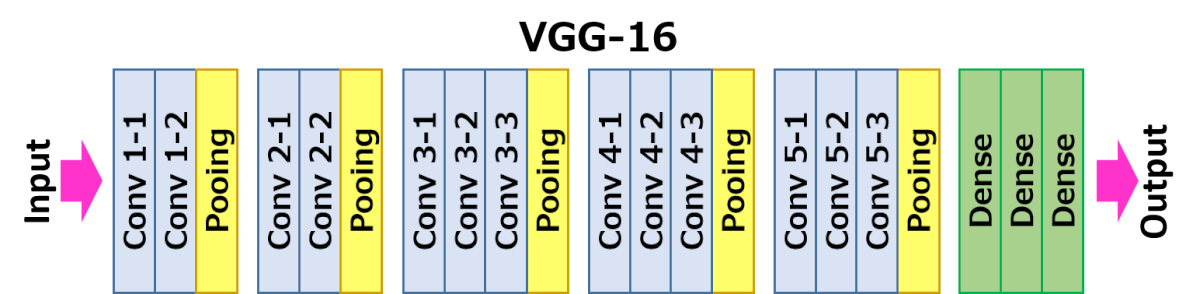

[Πηγή](https://neurohive.io/en/popular-networks/vgg16/)

Προσαρμόζουμε το δίκτυο:

In [24]:
# transfer learning: VGG16 trained on ImageNet without the top layer

def init_VGG16_model(summary , trainable):
  vgg_model=tf.keras.applications.VGG16(input_shape=(32,32,3), include_top=False, weights='imagenet')

  VGG16_MODEL=vgg_model.layers[0](vgg_model)

  # unfreeze or freeze conv layers
  VGG16_MODEL.trainable = trainable

  flatten = tf.keras.layers.Flatten()
  other_layer = tf.keras.layers.Dense(512, activation='elu')
  dropout_layer = tf.keras.layers.Dropout(rate = 0.5)

  # add top layer for CIFAR100 classification
  prediction_layer = tf.keras.layers.Dense(len(CIFAR100_LABELS_LIST),activation='softmax')

  model = tf.keras.Sequential([VGG16_MODEL, flatten,other_layer, dropout_layer,  prediction_layer])

  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.00008),
                loss=tf.keras.losses.sparse_categorical_crossentropy,
                metrics=["accuracy"])

  if summary: 
    model.summary()
  return model

Αυξάνουμε τα δεδομένα μέσω μετασχηματισμών των εικόνων:

In [25]:
from keras.preprocessing.image import ImageDataGenerator

image_gen_train = ImageDataGenerator(horizontal_flip = True, rotation_range = 15, width_shift_range = .12, height_shift_range = .12)

Και εκπαιδεύουμε το τελικό μας μοντέλο:

In [26]:
BATCH_SIZE = 250

train_ds      = image_gen_train.flow(x = x_train, y = y_train, batch_size = BATCH_SIZE, shuffle = True)
validation_ds = _input_fn(x_val, y_val, batch_size = BATCH_SIZE, reshuffle_each_iteration = False, repeat = False) 
test_ds       = _input_fn(x_test, y_test, batch_size = 1, reshuffle_each_iteration = False, repeat = False)

VGG16_MODEL = init_VGG16_model(True, True)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy')
VGG16_MODEL_history = train_model(VGG16_MODEL, callbacks = [mc], epochs = 70, steps_per_epoch = 60, validation_steps = 10)

58892288/58889256 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               51300     
Total params: 15,028,644
Trainable params: 15,028,644
Non-trainable params: 0
_________________________________________________________________
Epoch 1/70
60/60 [=========================

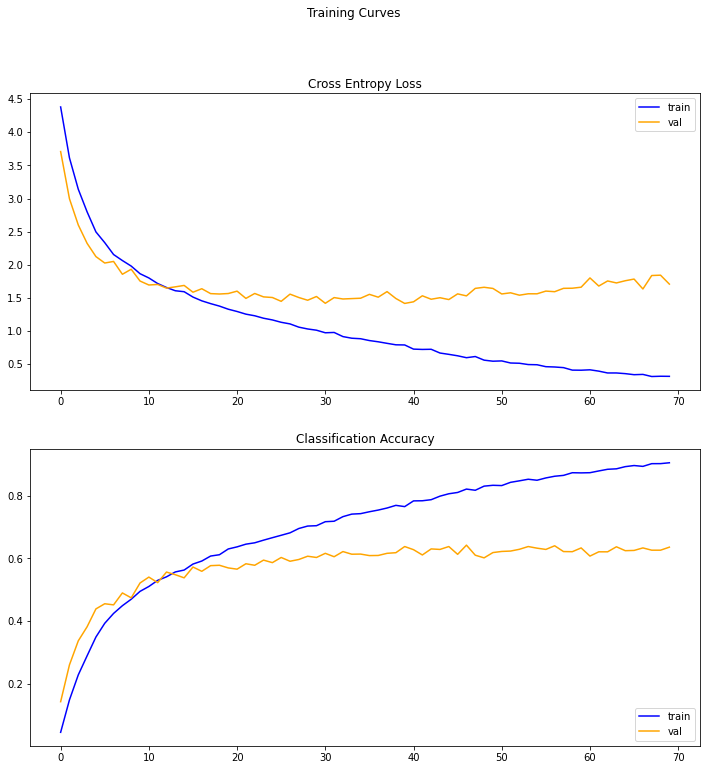


Test set evaluation metrics
8000/8000 [==============================] - 35s 4ms/step - loss: 1.6886 - accuracy: 0.6450
loss: 1.69
accuracy: 0.64


In [27]:
from tensorflow.keras.models import load_model
saved_cnn = load_model('best_model.h5')
model_report(saved_cnn, VGG16_MODEL_history, evaluation_steps = None)

### VGG 19
To VGG19 είναι ένα προεκπαιδευμένο μοντέλο 19 επιπέδων. Κινείται στη φιλοσοφία του VGG16, προσθέτοντας επίπεδα συνελικτικών φίλτρων.

Δεν αποδίδει αρκετά καλύτερα από το VGG19 σε σχέση με το μέγεθός του. Μια σύγκριση των αρχιτεκτονικών των 2 δικτύων μπορεί να γίνει στην παρακάτω εικόνα:

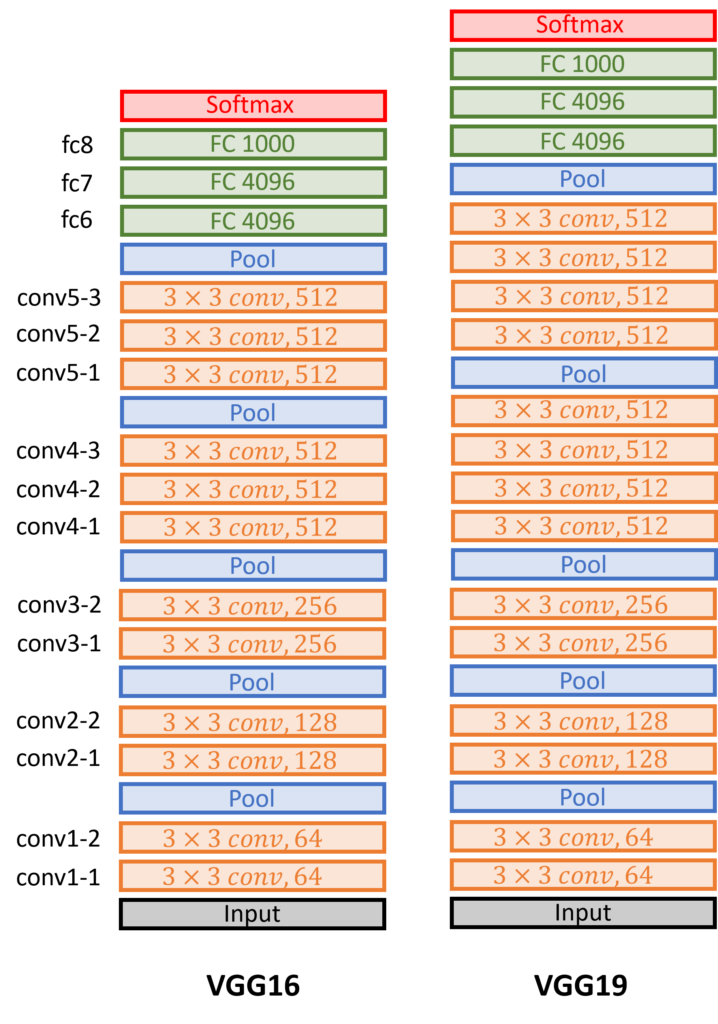


[Πηγή](http://datahacker.rs/deep-learning-vgg-16-vs-vgg-19/)

In [28]:
# transfer learning: VGG19 trained on ImageNet without the top layer

def init_VGG19_model(summary):
  vgg_model=tf.keras.applications.VGG19(input_shape=(32,32,3), include_top=False, weights='imagenet')
  
  VGG19_MODEL=vgg_model.layers[0](vgg_model)

  # unfreeze conv layers
  VGG19_MODEL.trainable=True
  
  flatten = tf.keras.layers.Flatten()
  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
  dropout_layer = tf.keras.layers.Dropout(rate = 0.5)  
  prediction_layer = tf.keras.layers.Dense(len(CIFAR100_LABELS_LIST),activation='softmax')
  model = tf.keras.Sequential([VGG19_MODEL, flatten, dropout_layer, prediction_layer])

  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001), 
                loss=tf.keras.losses.sparse_categorical_crossentropy, 
                metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint

BATCH_SIZE = 300

train_ds      = image_gen_train.flow(x = x_train, y = y_train, batch_size = BATCH_SIZE, shuffle = True)
validation_ds = _input_fn(x_val, y_val, batch_size = BATCH_SIZE, reshuffle_each_iteration = False, repeat = False) 
test_ds       = _input_fn(x_test, y_test, batch_size = 1, reshuffle_each_iteration = False, repeat = False)

VGG19_MODEL = init_VGG19_model(True)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy')
VGG19_MODEL_history = train_model(VGG19_MODEL, callbacks = [mc], epochs = 40, steps_per_epoch = 60, validation_steps = 10)

80142336/80134624 [==============================] - 0s 0us/step
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               51300     
Total params: 20,075,684
Trainable params: 20,075,684
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
60/60 [==============================] - 14s 181ms/step - loss: 4.7276 - accuracy: 0.0145 - val_loss: 4.3296 - val_accuracy: 0.0483
Epoch 2/40
60/60 [==============

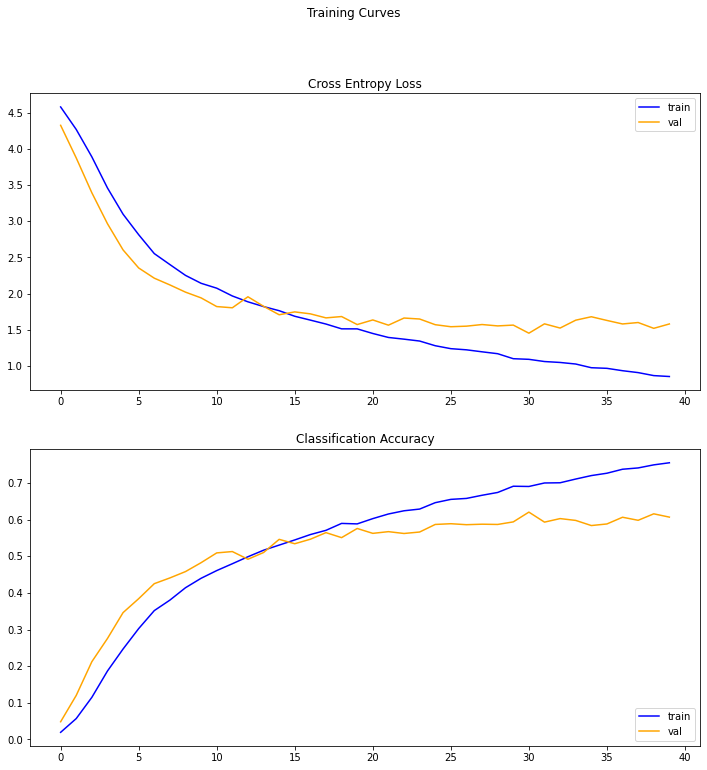


Test set evaluation metrics
8000/8000 [==============================] - 44s 5ms/step - loss: 1.5382 - accuracy: 0.6155
loss: 1.54
accuracy: 0.62


In [30]:
from tensorflow.keras.models import load_model
saved_cnn = load_model('best_model.h5')
model_report(saved_cnn, VGG19_MODEL_history, evaluation_steps = None)

### ResNet 50

To ResNet50 είναι ένα προεκπαιδευμένο μοντέλο βάθους 50 επιπέδων. Το δίκτυο έχει διαστάσεις εικόνας εισόδου 224x224, όπως και τα παραπάνω μοντέλα. H αρχιτεκτονική του δικτύου φαίνεται παρακάτω:

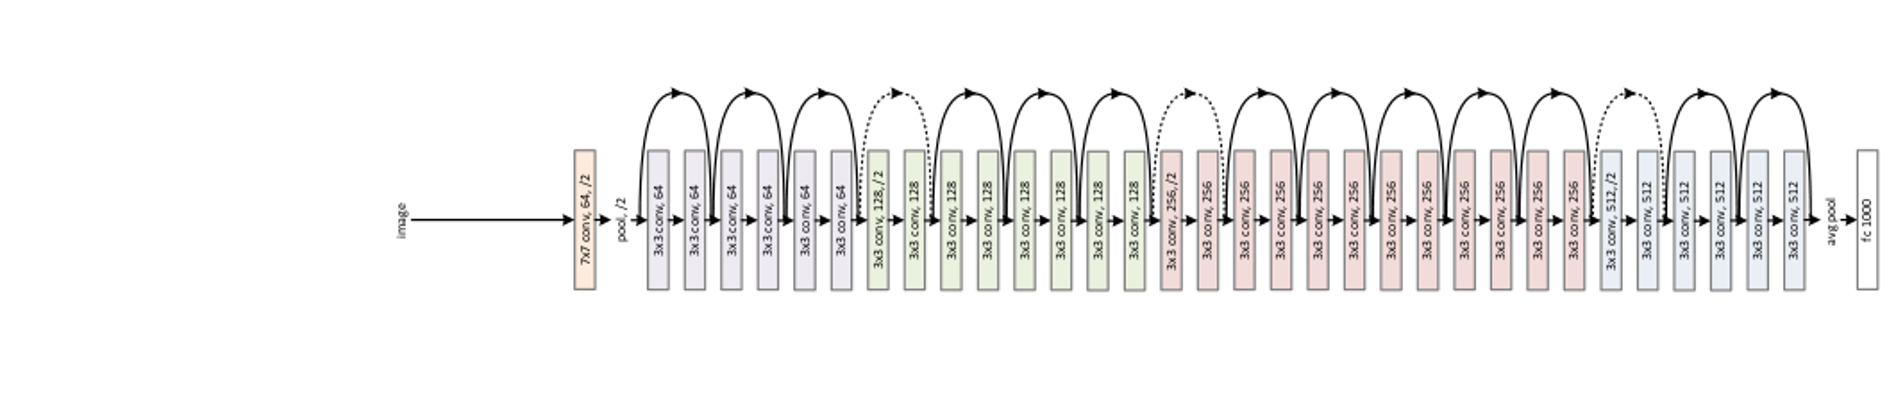

[Πηγή](https://www.kaggle.com/keras/resnet50
)

In [31]:
# transfer learning: RESNET trained on ImageNet without the top layer

def init_ResNet50_model(summary):
  ResNet_model=tf.keras.applications.ResNet50(input_shape=(32,32,3), include_top=False, weights='imagenet')
  
  RESNET=ResNet_model.layers[0]

  # unfreeze conv layers
  RESNET.trainable=True
  
  flatten = tf.keras.layers.Flatten()
  dropout_layer = tf.keras.layers.Dropout(rate = 0.5)
  prediction_layer = tf.keras.layers.Dense(len(CIFAR100_LABELS_LIST),activation='softmax')

  model = tf.keras.Sequential([RESNET, flatten, dropout_layer, prediction_layer])

  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001),              
                loss=tf.keras.losses.sparse_categorical_crossentropy, 
                metrics=["accuracy"])
  
  if summary: 
    model.summary()
  return model

In [49]:
BATCH_SIZE = 275

train_ds      = _input_fn(x_train, y_train, batch_size = BATCH_SIZE, reshuffle_each_iteration = True, repeat = True)
validation_ds = _input_fn(x_val, y_val, batch_size = BATCH_SIZE, reshuffle_each_iteration = False, repeat = False) 
test_ds       = _input_fn(x_test, y_test, batch_size = 1, reshuffle_each_iteration = False, repeat = False)

RESNET = init_ResNet50_model(True)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy')
RESNET_history = train_model(RESNET, epochs = 50, callbacks = [mc], steps_per_epoch = 65 , validation_steps = 10)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_13 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 100)               204900    
Total params: 23,792,612
Trainable params: 23,739,492
Non-trainable params: 53,120
_________________________________________________________________
Epoch 1/50
65/65 [==============================] - 16s 129ms/step - loss: 6.3243 - accuracy: 0.0191 - val_loss: 73.4645 - val_accuracy: 0.0113
Epoch 2/50
65/65 [==============================] - 8s 118ms/step - loss: 4.6037 - accurac

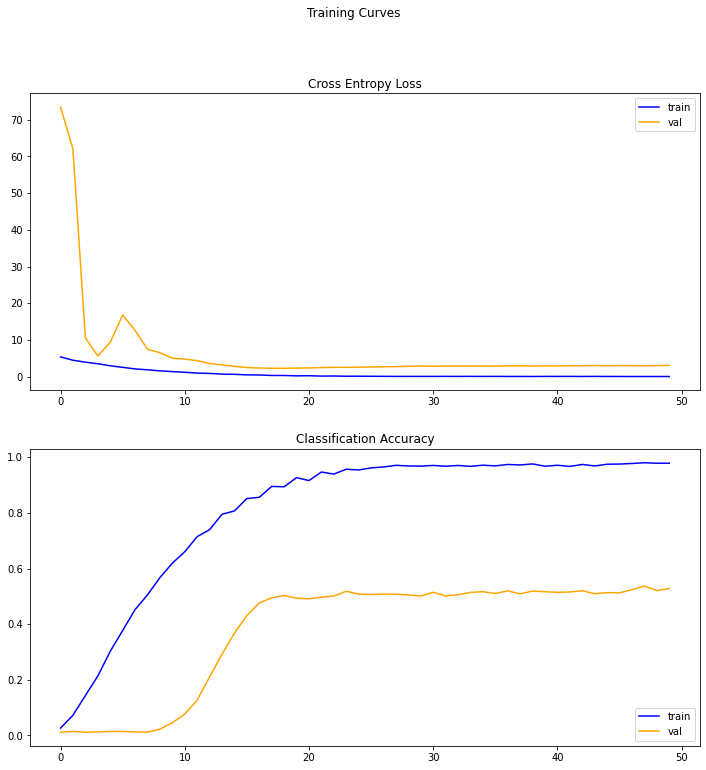


Test set evaluation metrics
8000/8000 [==============================] - 60s 7ms/step - loss: 3.0325 - accuracy: 0.5244
loss: 3.03
accuracy: 0.52


In [50]:
from tensorflow.keras.models import load_model
saved_cnn = load_model('best_model.h5')
model_report(saved_cnn, RESNET_history, evaluation_steps = None)

## Διαχείριση μνήμης (TFRecord)

Η φόρτωση δεδομένων -όπως γίνεται- στα παραπάνω παραδείγματα δεν είναι καθόλου αποτελεσματική ως προς τη διαχείριση της μνήμης. Συγκεκριμένα, με τον τρόπο αυτό, τα δεδομένα αποθηκεύονται απευθείας σε μεταβλητές, οι οποίες όλες μαζί καταλαμβάνουν τη RAM της CPU ή της GPU, κάτι που κάνει αδύνατη τη διαχείριση μεγάλων datasets ή τον μεταχηματισμό των δεδομένων όπως όταν κάνουμε αύξηση δεδομένων (data augmentation).

Για να παρακαμφθεί αυτό το πρόβλημα, υπάρχει η δυνατότητα της σειριοποίησης των δεδομένων (serialization) και της αποθήκευσής τους σε αρχεία μεσαίου μεγέθους (κάποιων MB) τα οποία μπορούνα να αναγνωστούν γραμμικά. Το φορμάτ TFRecord είναι ένα φορμάτ που επιτρέπει την αποθήκευση σειράς δυαδικών εγγραφών. 

Κάνοντας χρήση της λειτουργικότητας σειριοποίησης που δίνεται στο [TFRecord and tf.Example](https://www.tensorflow.org/tutorials/load_data/tfrecord), αναπτύσσουμε τον κώδικα για την αποτελεσματική διαχείρηση μνήμης και εκπαιδεύουμε ξανά με μεταφορά γνώσης από το VGG16:


In [38]:
import sys
from matplotlib.image import imread

def print_progress(count, total):
    pct_complete = float(count) / total
    msg = "\r- Progress: {0:.1%}".format(pct_complete)

    sys.stdout.write(msg)
    sys.stdout.flush()
    return

def wrap_int64(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def _bytes_feature(value):
    if isinstance(value, type(tf.constant(0))):
        value = value.numpy() 
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def convert(X, y, train, out_path):
    print("Converting: " + out_path)
    num_images = len(X)

    if train:
        image_gen_train.fit(X)

    with tf.io.TFRecordWriter(out_path) as writer:
        
        for i, (img, label) in enumerate(zip(X, y)):
            print_progress(count=i, total=num_images-1)
            img_bytes = tf.io.serialize_tensor(img)
            data = \
                {
                    'image': _bytes_feature(img_bytes),
                    'label': wrap_int64(label)
                }
            feature = tf.train.Features(feature=data)
            example = tf.train.Example(features=feature)
            serialized = example.SerializeToString()
            writer.write(serialized)

        return

In [41]:
train_tf_path = 'train.tfrecords'
val_tf_path = 'val.tfrecords'
test_tf_path = 'test.tfrecords'

convert(X = x_train, y = y_train, train = True, out_path = train_tf_path)
convert(X = x_train, y = y_train, train = True, out_path = val_tf_path)
convert(X = x_train, y = y_train, train = True, out_path = test_tf_path)

Converting: train.tfrecords
- Progress: 100.0%Converting: val.tfrecords
- Progress: 100.0%

In [ ]:
def parse(serialized):
    features = {
        'image': tf.io.FixedLenFeature((), tf.string),
        'label': tf.io.FixedLenFeature((), tf.int64)
    }

    example = tf.io.parse_single_example(serialized, features)    
    image = tf.io.parse_tensor(example['image'], out_type=tf.float64)
    image = tf.reshape(image, [32,32,3]) 
    return image, example['label']

def input_fn(filenames, train, batch_size=250, buffer_size=512):
    dataset = tf.data.TFRecordDataset(filenames=filenames)
    dataset = dataset.map(parse)
    print(dataset)

    if train:
        dataset = dataset.shuffle(buffer_size = buffer_size)
        num_repeat = None
    else:
        num_repeat = 1

    dataset = dataset.repeat(num_repeat)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(buffer_size = AUTOTUNE)

    return dataset    

### Εκπαίδευση με διαχείριση Μνήμης

In [ ]:
BATCH_SIZE = 250

train_ds = input_fn(train_tf_path, train=True, batch_size=BATCH_SIZE)
validation_ds = input_fn(val_tf_path, train=False, batch_size=BATCH_SIZE) 
test_ds = input_fn(test_tf_path, train=False, batch_size=BATCH_SIZE)

<MapDataset shapes: ((32, 32, 3), ()), types: (tf.float64, tf.int64)>
<MapDataset shapes: ((32, 32, 3), ()), types: (tf.float64, tf.int64)>
<MapDataset shapes: ((32, 32, 3), ()), types: (tf.float64, tf.int64)>


In [42]:
VGG16_MODEL = init_VGG16_model(True, True)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy')
VGG16_MODEL_history = train_model(VGG16_MODEL, callbacks = [mc], epochs = 70, steps_per_epoch = 60, validation_steps = 10)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_9 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 100)               51300     
Total params: 15,028,644
Trainable params: 15,028,644
Non-trainable params: 0
_________________________________________________________________
Epoch 1/70
60/60 [==============================] - 7s 81ms/step - loss: 4.5644 - accuracy: 0.0324 - val_los

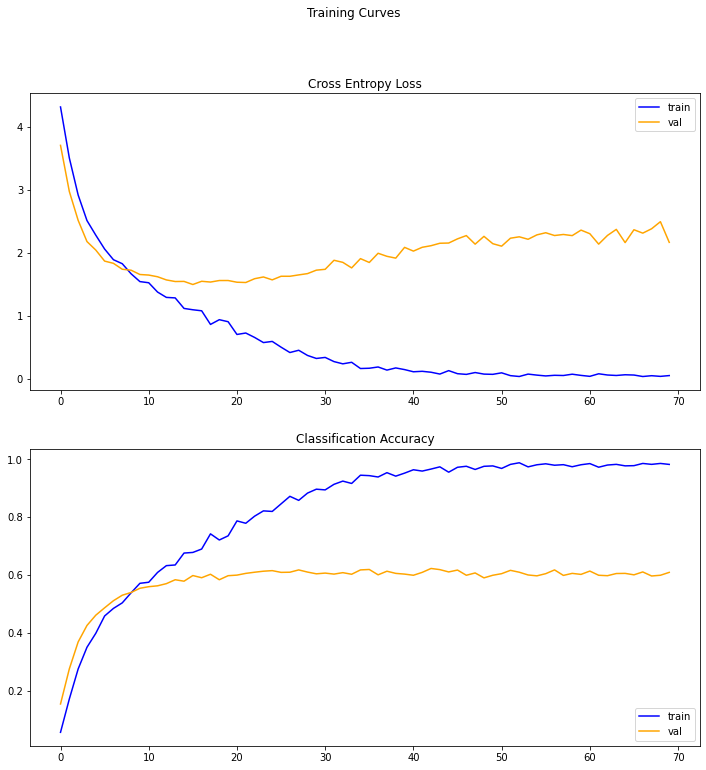


Test set evaluation metrics
8000/8000 [==============================] - 35s 4ms/step - loss: 2.2248 - accuracy: 0.6018
loss: 2.22
accuracy: 0.60


In [43]:
from tensorflow.keras.models import load_model
saved_vgg = load_model('best_model.h5')

model_report(saved_vgg, VGG16_MODEL_history, evaluation_steps=None)

---

# Σχόλια & Συμπεράσματα

Ολοκληρώσαμε την εργασία έχοντας εκπαιδεύσει ένα δίκτυο από το μηδέν και έχοντας μεταφέρει γνώση από 3 προεκπαιδευμένα μοντέλα. Χρησιμοποιήσαμε επαύξηση δεδομένων σε όλα τα μοντέλα που εκπαιδεύσαμε. Η μνήμη δεν αποτέλεσε πρόβλημα για τις τάξεις μεγέθους του προβλήματος. Παρ΄όλα αυτά υλοποιήσαμε σειριοποίηση και επανεκπαιδεύσαμε το VGG16 με δεδομένα σε TF format. Πειραματιστήκαμε με το learning rate, τις εποχές, το μέγεθος δέσμης (batch size) και τις λοιπές παραμέτρους καθώς και με διάφορες αρχιτεκτονικές συνελικτικών δικτύων. Κύριος στόχος μας ήταν να εξερευνήσουμε τις δυνατότητες βελτιστοποίησης των συνελικτικών δικτύων και δεν επιμείναμε πολύ στο να πετύχουμε μια υψηλή ακρίβεια. Παραθέτουμε τα αποτελέσματα της εφαρμογής μας στον παρακάτω πίνακα:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-fkr1{font-family:Verdana, Geneva, sans-serif !important;;font-size:20px;text-align:right;vertical-align:top}
.tg .tg-bzd5{font-family:Verdana, Geneva, sans-serif !important;;font-size:20px;font-weight:bold;text-align:center;
  vertical-align:top}
.tg .tg-0gd6{font-family:Verdana, Geneva, sans-serif !important;;font-size:20px;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-bzd5">Συνελικτικό<br>Δίκτυο</th>
    <th class="tg-bzd5">Ακρίβεια</th>
    <th class="tg-bzd5">Παράμετροι</th>
    <th class="tg-bzd5">Εποχές</th>
    <th class="tg-bzd5">Χρόνος<br>[min]</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-fkr1">myCNN</td>
    <td class="tg-0gd6">59%</td>
    <td class="tg-0gd6">1.431.160</td>
    <td class="tg-0gd6">250</td>
    <td class="tg-0gd6">62.9</td>
  </tr>
  <tr>
    <td class="tg-fkr1">VGG16</td>
    <td class="tg-0gd6">64%</td>
    <td class="tg-0gd6">15.028.644</td>
    <td class="tg-0gd6">70</td>
    <td class="tg-0gd6">9.3</td>
  </tr>
  <tr>
    <td class="tg-fkr1">VGG19</td>
    <td class="tg-0gd6">62%</td>
    <td class="tg-0gd6">20.075.684</td>
    <td class="tg-0gd6">40</td>
    <td class="tg-0gd6">6.6</td>
  </tr>
  <tr>
    <td class="tg-fkr1">ResNet50</td>
    <td class="tg-0gd6">62%</td>
    <td class="tg-0gd6">23.792.612</td>
    <td class="tg-0gd6">50</td>
    <td class="tg-0gd6">6.7</td>
  </tr>
  <tr>
    <td class="tg-fkr1">VGG16<br>(TF)</td>
    <td class="tg-0gd6">60%</td>
    <td class="tg-0gd6">15.028.644</td>
    <td class="tg-0gd6">70</td>
    <td class="tg-0gd6">5.8</td>
  </tr>
</tbody>
</table>

Γίνεται αντιληπτό από τα αποτελέσματα, ότι το from scratch δίκτυό μας εκπαιδεύτηκε 1 ώρα αλλά δεν ξεπέρασε την ακρίβεια των προεκπαιδευμένων δικτύων που χρειάστηκαν λίγα λεπτά για την εκπαίδευση των μοντέλων.

* **Μεταφορά μάθησης vs Εκπαίδευση εκ του μηδενός**

Η επιλογή ανάμεσα σε εκπαίδευση εκ του μηδενός ή μέσω μεταφοράς μάθησης για το πρόβλημα της κατηγοριοποίησης εικόνων εξαρτάται από τα χαρακτηριστικά του προβλήματος. Η μεταφορά γνώσης μας γλυτώνει, ιδιαίτερα σε σύνθετα προβλήματα, από χρόνο και κόπο
και μπορεί να αυξήσει σημαντικά το sample efficiency. Αν το προεκπαιδευμένο δίκτυο έχει εκπαιδευτεί σε παρόμοια δεδομένα τότε το fine-tuning μπορεί να είναι πολύ απλό. Η αρχικοποίηση των βαρών σε τιμές που κατηγοριοποιούν ένα παρόμοιο σύνολο δεδομένων μπορεί να μειώσει σημαντικά το απαραίτητο για την εκπαίδευση πλήθος δεδομένων. Από την άλλη μεριά για εξειδικευμένα προβλήματα καθώς και προβλήματα με σχετική ευκολία (πολυπλοκότητα, μέγεθος, χρόνος) μπορούμε να σχεδιάσουμε ένα δικό μας δίκτυο.
* **Επίδραση της επαύξησης δεδομένων**

Η επαύξηση δεδομένων, τόσο στη θεωρία όσο και στην παραπάνω εφαρμογή, βοήθησε στην αποφυγή overfitting στα δεδομένα. Ο πολλαπλασιασμός των εικόνων μέσω περιστροφών, ανακλάσεων, μεγεθύνσεων κλπ κανονικοποιεί το σύνολο δεδομένων. Υπερβολική επαύξηση όμως, οδηγεί σε oversampling.
* **Επίδραση του fine-tuning κατά τη μεταφορά μάθησης**

Καλή πρακτική είναι να ξεκινάμε μόνο με τη μεταφορά γνώσης, ιδιαίτερα όταν το προεκπαιδευμένο μοντέλο έχει εκπαιδεύτει σε παρόμοιο σύνολο δεδομένων. Αυτό μας δίνει ένα baseline αποτέλεσμα. Μετά προσαρμόζουμε μόνο τα επίπεδα της ταξινόμησης και τέλος προχωράμε -αν χρειαστεί- στα συνελικτικά blocks. Εν γένει όσο πιο βαθιά βρίσκεται ένα συνελικτικό επίπεδο, τόσο πιο σύνθετα χαρακτηριστικά ψάχνει στην εικόνα. Συνεπώς, το fine-tuning ενός δικτύου, πρέπει να γίνεται με προσοχή όταν ξεπερνάει τα επίπεδα της κατηγοριοποίησης.


#Τέλος Εργασίας

To VGG16 γραφικά:

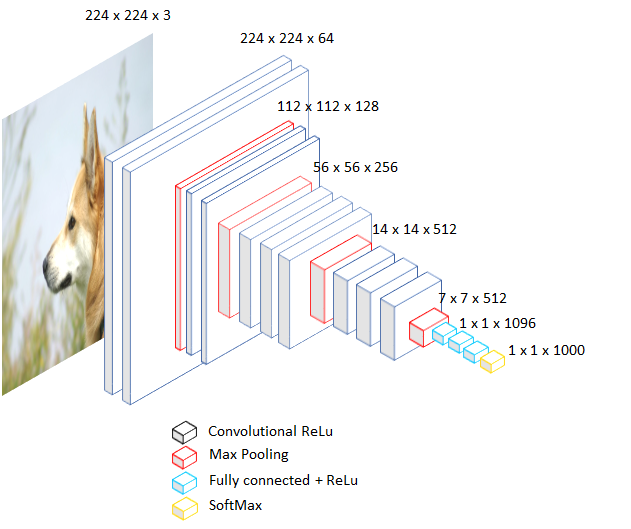

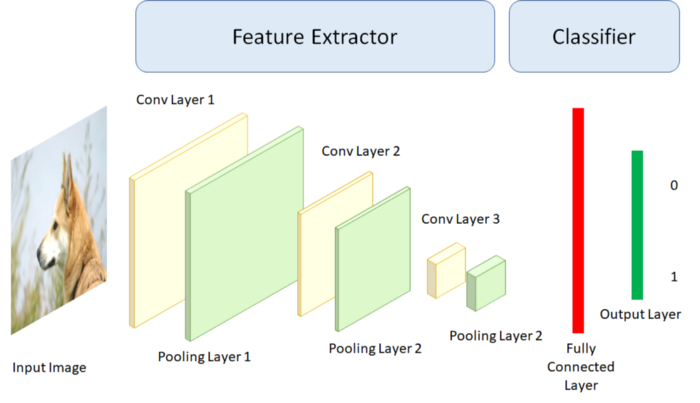

[Πηγή](https://towardsdatascience.com/cnn-transfer-learning-fine-tuning-9f3e7c5806b2)